In [1]:
import pandas as pd

In [2]:
minhash = pd.read_csv("minhash.csv", header=None)

In [3]:
minhash.columns = ['A', 'B', 'val']

<AxesSubplot:>

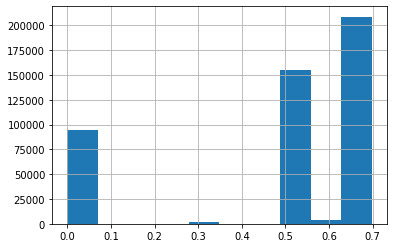

In [5]:
minhash['val'].hist()

In [25]:
((minhash['val'] > 0.6) & (minhash['val'] <= 0.7)).sum()

208957

### Train Accuracy

In [13]:
user = pd.read_json("cleaned_user.json")

In [48]:
some_minhash = minhash[(minhash['val'] <= 0.3) & (minhash['val'] >= 0)]
some_minhash.shape

(94547, 3)

In [49]:
from tqdm import tqdm

cnt = 0

for row in tqdm(some_minhash.iterrows()):
    a = row[1]['A']
    b = row[1]['B']
    
    set_a = set()
    
    if a in user[user.id == b].iloc[0].friend_id or b in user[user.id == a].iloc[0].friend_id:
        cnt += 1

print(cnt)

94547it [02:21, 668.97it/s]

234


In [52]:
user[['id', 'friend_id']].to_csv('user_friend.csv', sep='\t')